In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import torch

In [2]:
#Format Data for KNN - 17 '
#load dataset, training and testing, examples(x) and labels(y)
train_x = torch.load("train_x.pt", map_location=torch.device('cpu')).numpy()
train_y = torch.load("train_y.pt", map_location=torch.device('cpu')).numpy()
test_x = torch.load("test_x.pt", map_location=torch.device('cpu')).numpy()
test_y = torch.load("test_y.pt", map_location=torch.device('cpu')).numpy()

#Format data - 
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2]) 
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2]) 

FeatureNames=['fighting','front', 'ready','cat', 'horse', 'hicho','seiza']


In [8]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

pcaAcc = []
#nca = NeighborhoodComponentsAnalysis()
for i in range(1,50):
    pca = PCA(n_components=i)
    knn = KNeighborsClassifier(n_neighbors=1) #i 1 or 5
    nca_pipe = Pipeline([('pca',pca),('knn',knn)])
    nca_pipe.fit(train_x, train_y)
    print("Accuracy: ", nca_pipe.score(test_x, test_y))
    y_pred = nca_pipe.predict(test_x)
    print( confusion_matrix(test_y, y_pred))
    pcaAcc.append(nca_pipe.score(test_x, test_y))
#Try PCA for visualization : - 



TypeError: 'tuple' object is not callable

<function matplotlib.pyplot.show(*args, **kw)>

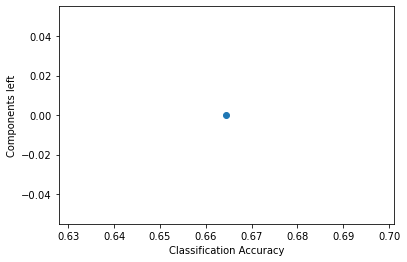

In [4]:
import matplotlib.pyplot as plt
plt.scatter(pcaAcc, range(0,len(pcaAcc)))
plt.ylabel('Components left')
plt.xlabel('Classification Accuracy')
plt.show

In [5]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(test_y, y_pred))
print("Recall: ",metrics.recall_score(test_y, y_pred, average='weighted'))
#print("Specificity: ",metrics.accuracy_score(test_y, y_pred))
print("Precision: ",metrics.precision_score(test_y, y_pred,average='weighted'))
#print("Negative Predictive value: ",metrics.accuracy_score(test_y, y_pred))
#print("FP rate(fall-out): ",metrics.accuracy_score(test_y, y_pred))

Accuracy:  0.6644736842105263
Recall:  0.6644736842105263
Precision:  0.6822309982529958


In [6]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred, target_names=FeatureNames))


              precision    recall  f1-score   support

    fighting       0.40      0.71      0.51        14
       front       0.52      0.47      0.49        34
       ready       0.70      0.84      0.76        19
         cat       0.60      0.40      0.48        15
       horse       0.67      0.57      0.62        35
       hicho       1.00      0.80      0.89        10
       seiza       1.00      1.00      1.00        25

    accuracy                           0.66       152
   macro avg       0.70      0.69      0.68       152
weighted avg       0.68      0.66      0.66       152



Explained variation per principal component: [0.21036823 0.17297483 0.13700656]


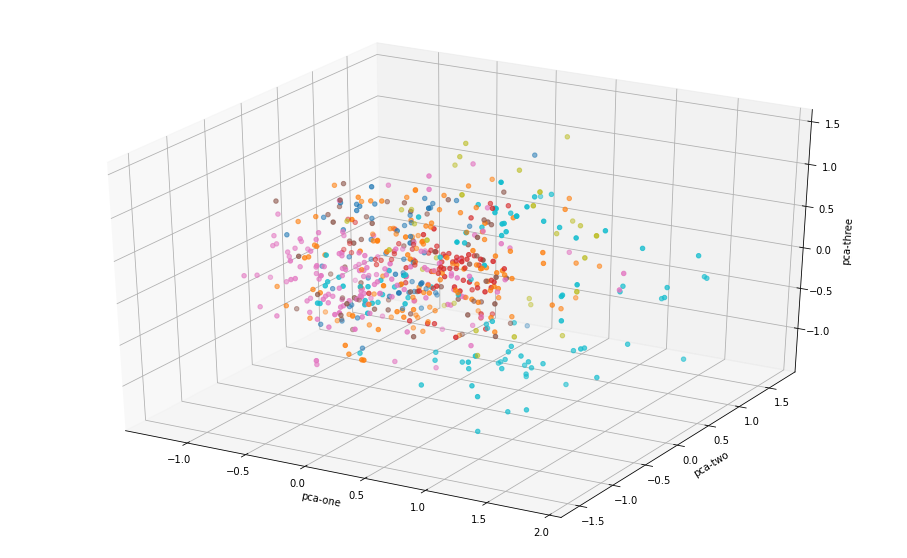

In [7]:
#nca = NeighborhoodComponentsAnalysis(i)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_x,train_y)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=train_y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()